In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

# raddar_chest_xrays_tuberculosis_from_india_path = kagglehub.dataset_download('raddar/chest-xrays-tuberculosis-from-india')
# pranavraikokte_covid19_image_dataset_path = kagglehub.dataset_download('pranavraikokte/covid19-image-dataset')
# tolgadincer_labeled_chest_xray_images_path = kagglehub.dataset_download('tolgadincer/labeled-chest-xray-images')
nazmul0087_ct_kidney_dataset_normal_cyst_tumor_and_stone_path = kagglehub.dataset_download('nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone')
# sujaykapadnis_chest_diseases_by_medical_imaging_and_cough_sounds_path = kagglehub.dataset_download('sujaykapadnis/chest-diseases-by-medical-imaging-and-cough-sounds')
# amrutsardesh_efficientnetb0_tensorflow2_default_1_path = kagglehub.model_download('amrutsardesh/efficientnetb0/TensorFlow2/default/1')

print('Data source import complete.')


100%|██████████| 1.52G/1.52G [00:15<00:00, 105MB/s]

Extracting files...


Data source import complete.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import cv2


data_dir = {
    "cyst": "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst",
    "stone": "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone",
    "tumor": "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor",
    "healthy": "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal"
}


IMG_SIZE = (128, 128)
LIMIT = 200
CLASSES = list(data_dir.keys())


def load_images(data_dir, limit=LIMIT):
    images, labels = [], []
    for label, path in data_dir.items():
        count = 0
        for file in os.listdir(path):
            if count >= limit:
                break
            try:
                img = load_img(os.path.join(path, file), target_size=IMG_SIZE)
                img = img_to_array(img) / 255.0  # Normalize
                images.append(img)
                labels.append(CLASSES.index(label))
                count += 1
            except Exception as e:
                print(f"Error loading image {file}: {e}")
    return np.array(images), np.array(labels)


images, labels = load_images(data_dir)


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# encoding
y_train = np.eye(len(CLASSES))[y_train]
y_test = np.eye(len(CLASSES))[y_test]



In [ ]:
# Step 1: Build the Model
def build_model(input_shape=(128, 128, 3), num_classes=4):
    model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(len(CLASSES), activation='softmax')
    ])
    return model

# Step 2: Compile the Model
kidney_model = build_model()
kidney_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = kidney_model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=16)
print(kidney_model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.3594 - loss: 1.5075 - val_accuracy: 0.7031 - val_loss: 0.8591
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7852 - loss: 0.6372 - val_accuracy: 0.8672 - val_loss: 0.4653
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9259 - loss: 0.2613 - val_accuracy: 0.8672 - val_loss: 0.3979
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9643 - loss: 0.1170 - val_accuracy: 0.8984 - val_loss: 0.4438
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9548 - loss: 0.1379 - val_accuracy: 0.9062 - val_loss: 0.3956
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9990 - loss: 0.0280 - val_accuracy: 0.9141 - val_loss: 0.4737
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9970 - loss: 0.0229 - val_accuracy: 0.9141 - val_loss: 0.4653
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 0.9219 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,178,510 (84.60 MB)

 Trainable params: 7,392,836 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,785,674 (56.40 MB)

None


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9689 - loss: 0.1696
Test Accuracy: 0.956250011920929


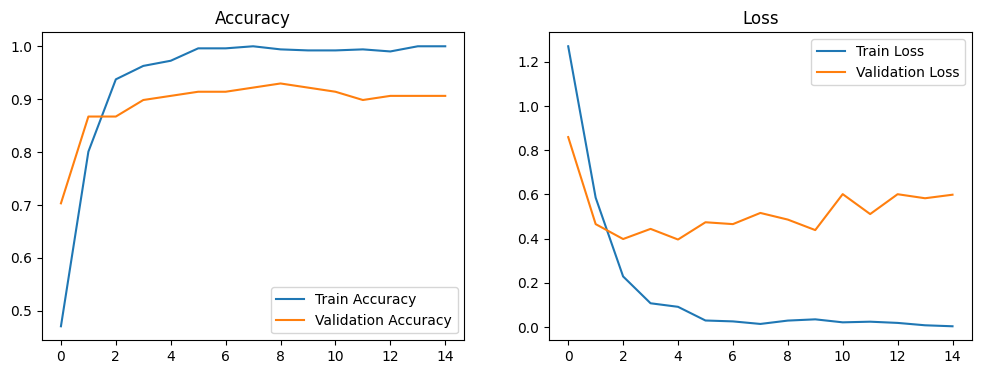

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


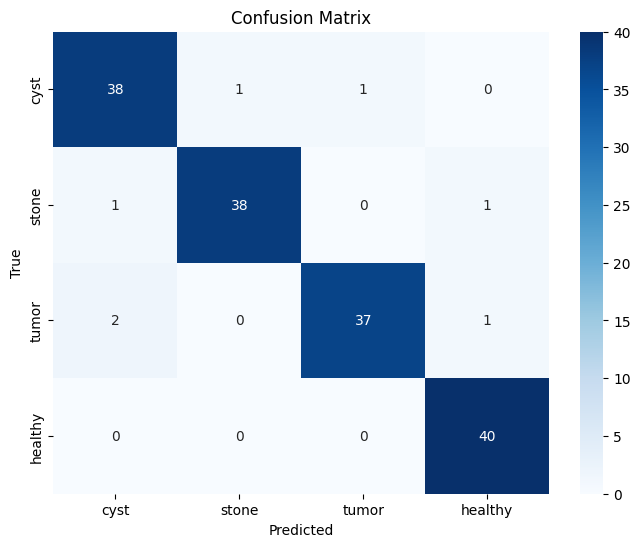

Classification Report:
              precision    recall  f1-score   support

        cyst       0.93      0.95      0.94        40
       stone       0.97      0.95      0.96        40
       tumor       0.97      0.93      0.95        40
     healthy       0.95      1.00      0.98        40

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160



In [ ]:
test_loss, test_acc = kidney_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# training accuracy and vali accuracy ploting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Predictions on test data
y_pred = kidney_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=CLASSES))




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


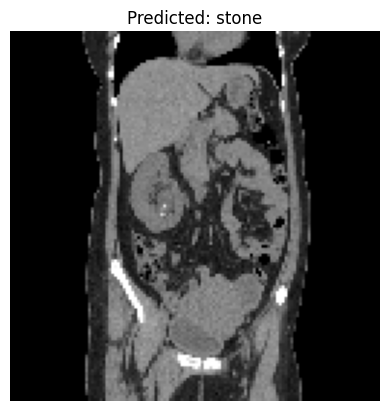

In [ ]:
# Testing with new images
def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = kidney_model.predict(img_array)
    predicted_class = CLASSES[np.argmax(prediction)]
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

test_image = "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (541).jpg"
predict_image(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


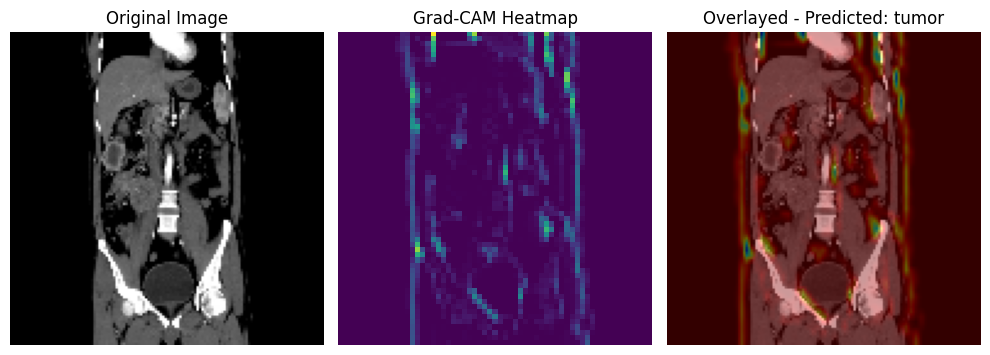

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model


# Simulate Model Initialization
_ = kidney_model.predict(np.zeros((1, 128, 128, 3)))  # Initialize model with dummy data

# Step 3: Grad-CAM Functions
def compute_gradcam(model, img_array, layer_name, class_idx):


    grad_model = Model([model.inputs], [model.get_layer("conv2d_1").output, model.get_layer("dense_1").output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # Global average pooling

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(conv_outputs * pooled_grads, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU to remove negative values
    heatmap /= np.max(heatmap)  # Normalize to [0, 1]
    return heatmap

def overlay_heatmap(img, heatmap, alpha=0.4, colormap=cv2.COLORMAP_JET):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)
    overlayed_image = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return overlayed_image

def gradcam_visualization(model, image_path, layer_name='conv2d_1'):
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict class
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions)
    class_label = ["cyst", "stone", "tumor", "healthy"][class_idx]  # Replace with actual class names

    # Compute Grad-CAM
    heatmap = compute_gradcam(model, img_array, layer_name, class_idx)

    # Load original image
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    original_img = cv2.resize(original_img, (128, 128))

    # Overlay heatmap
    overlayed_img = overlay_heatmap(original_img, heatmap)

    # Plot Results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='viridis')
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlayed_img)
    plt.title(f"Overlayed - Predicted: {class_label}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Step 4: Test Grad-CAM
test_image = "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1493).jpg"
gradcam_visualization(kidney_model, test_image, layer_name='conv2d_1')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


<ipython-input-35-0ce18d8a71da>:24: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)  # Normalize to [0, 1]
<ipython-input-35-0ce18d8a71da>:29: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


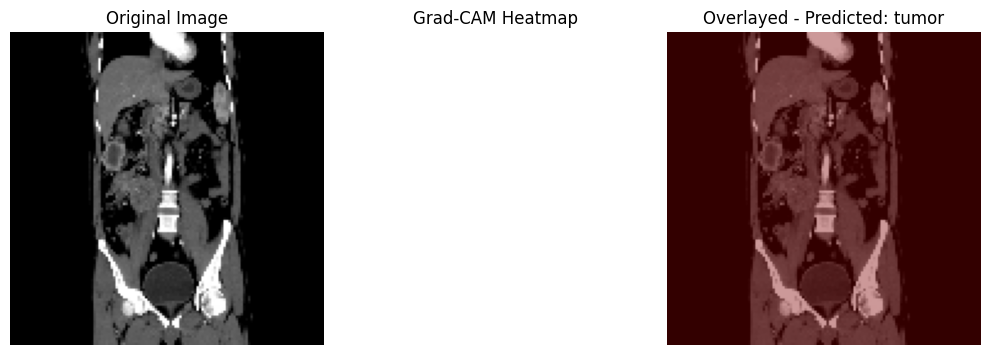

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


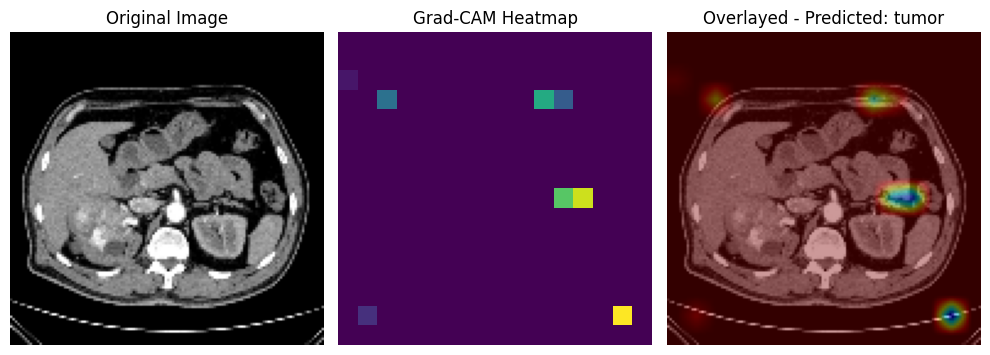

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


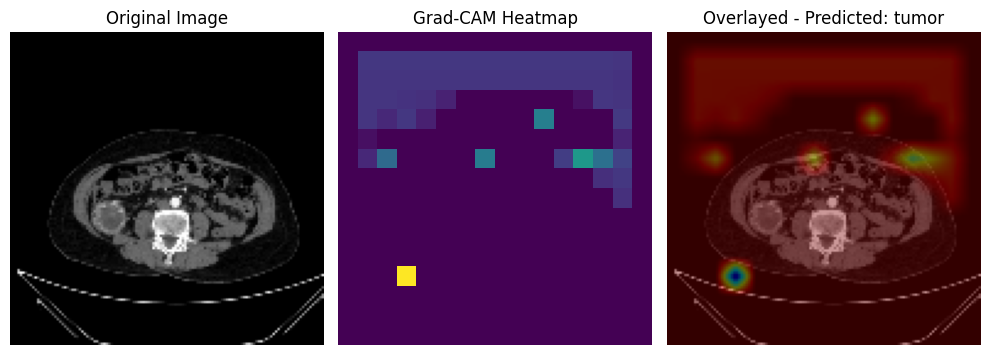

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


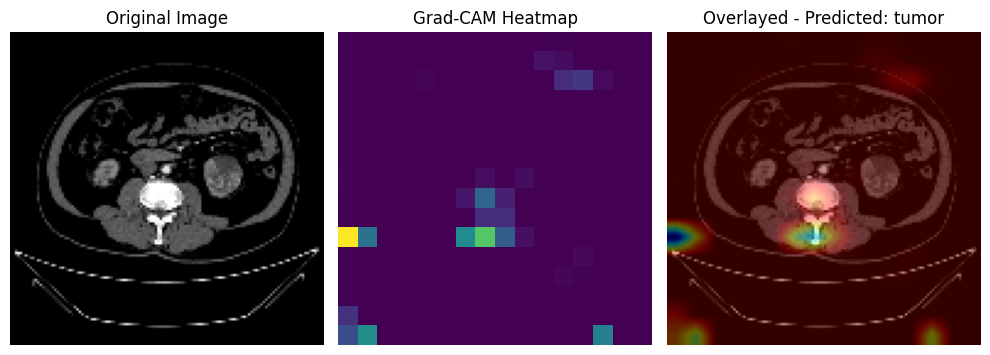

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


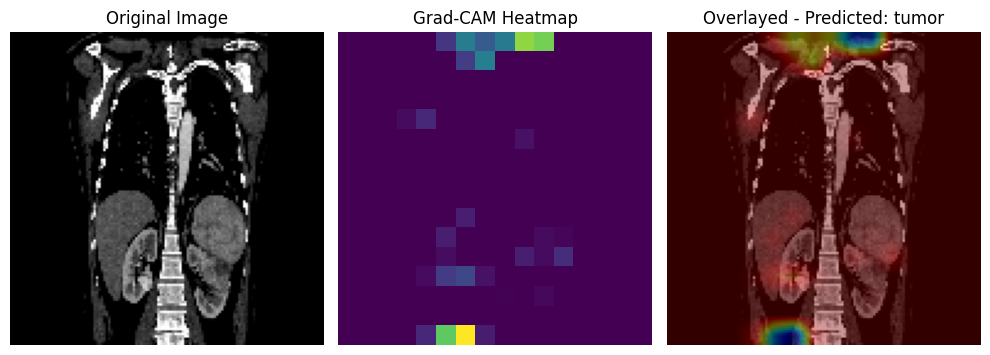

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


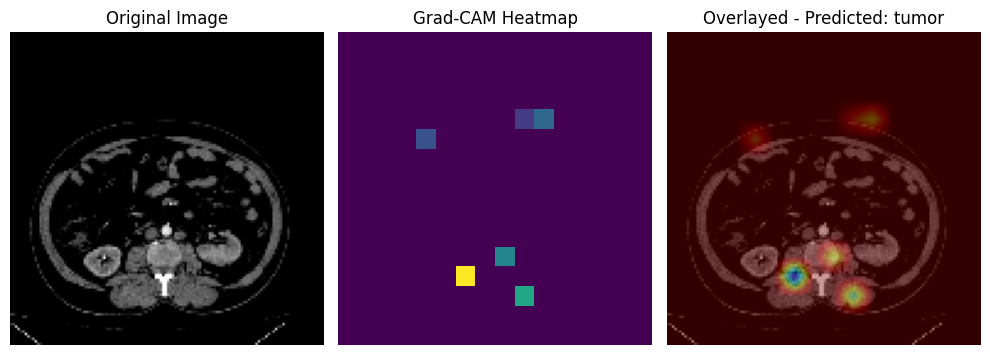

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


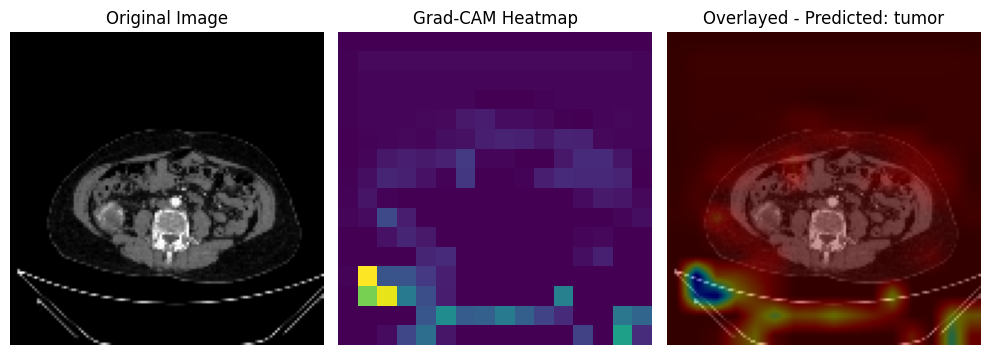

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


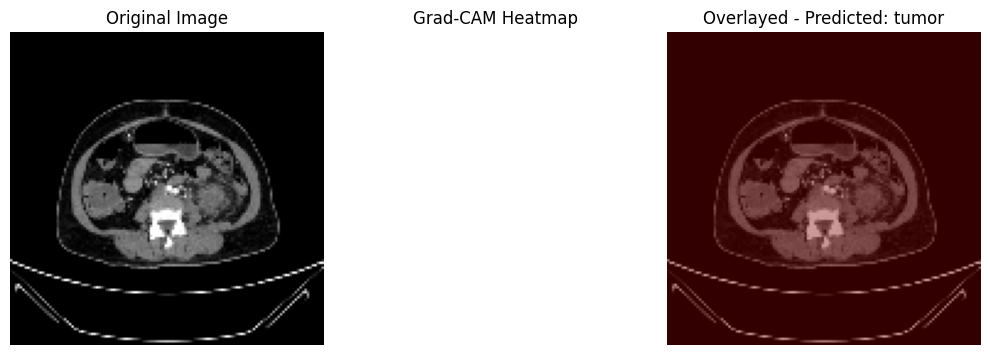

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


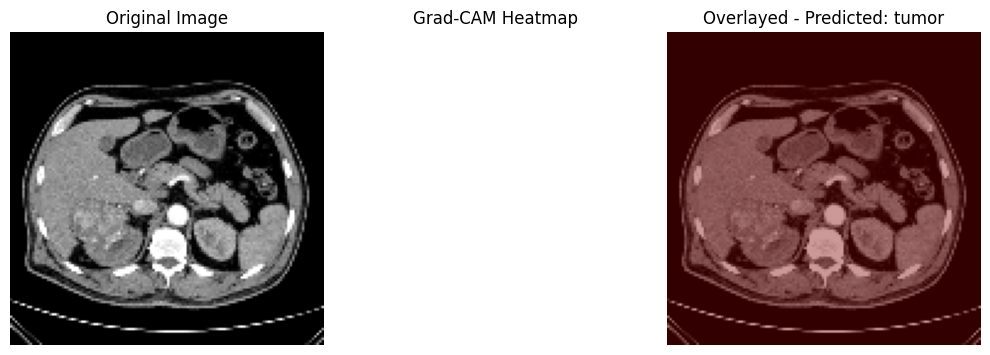

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


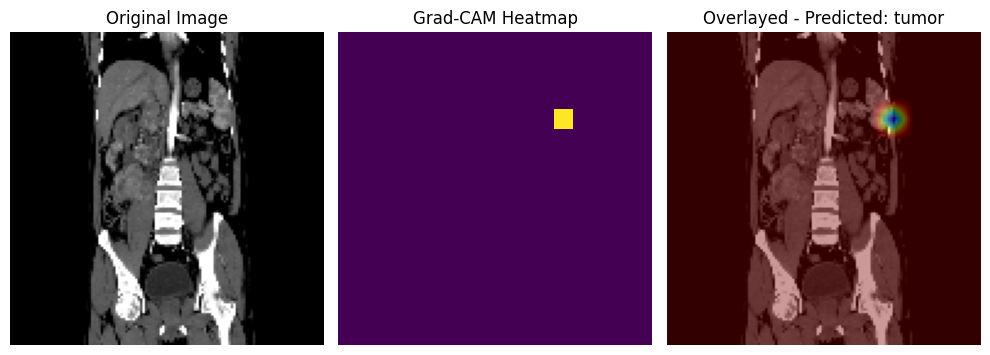

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


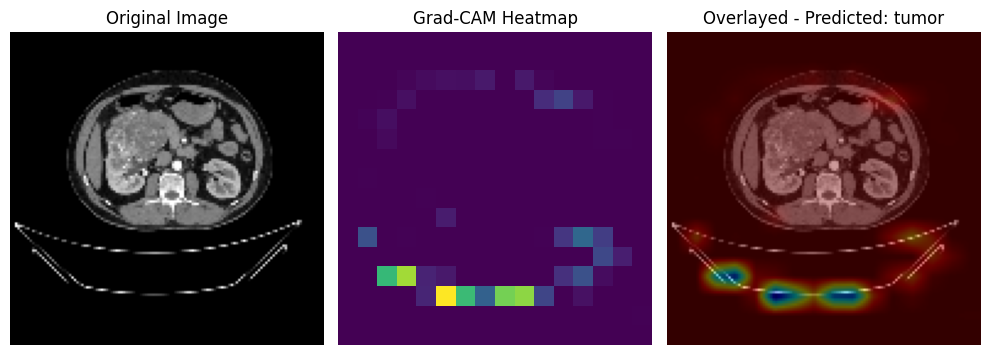

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


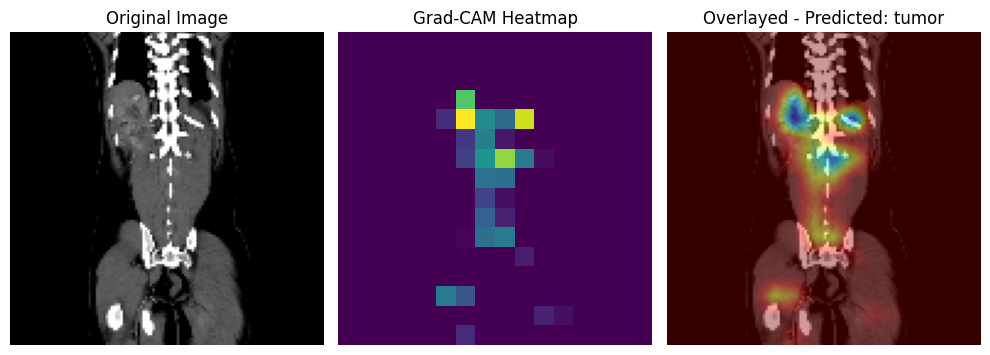

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


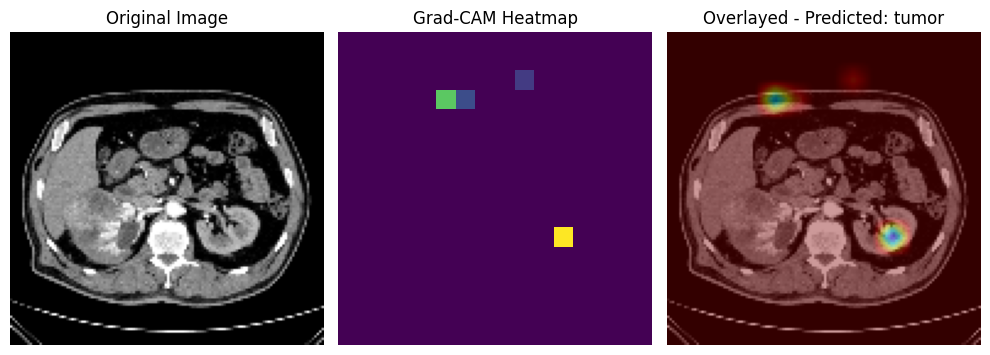

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


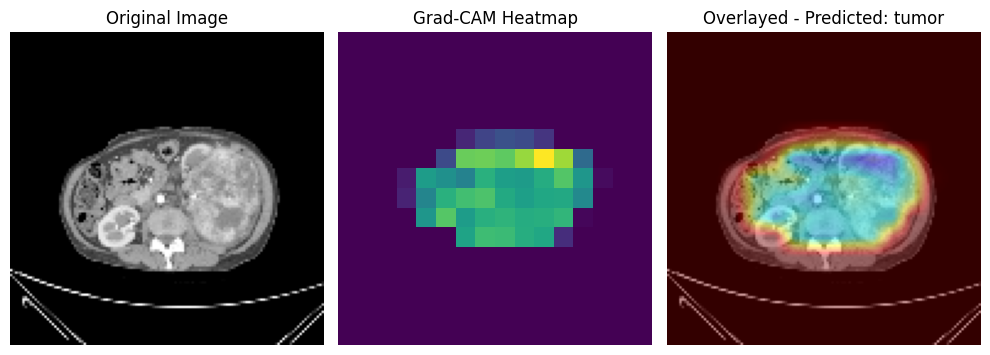

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


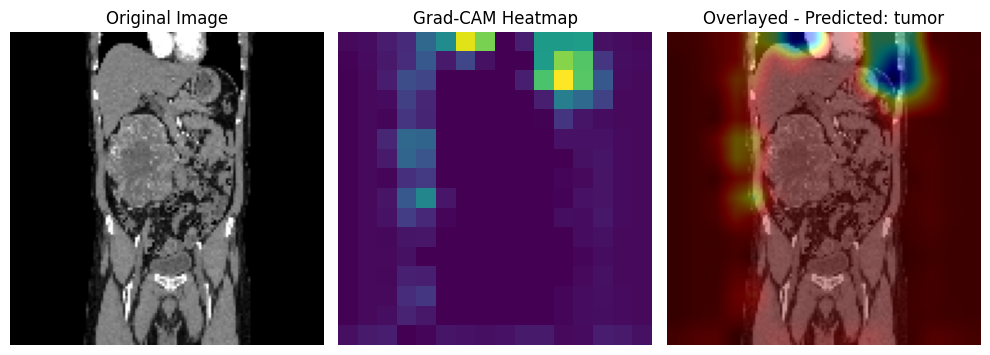

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


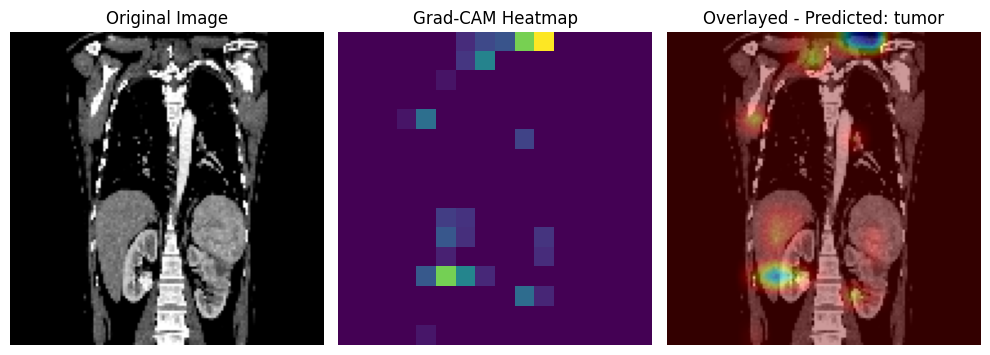

In [ ]:
image_paths = [
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1493).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (458).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (914).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1894).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1110).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1016).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (919).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1819).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (443).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1516).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (37).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1594).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (480).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (649).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (248).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1236).jpg",
]

for image_path in image_paths:
    gradcam_visualization(kidney_model, image_path, layer_name='conv2d_5')

Predicted class: 2


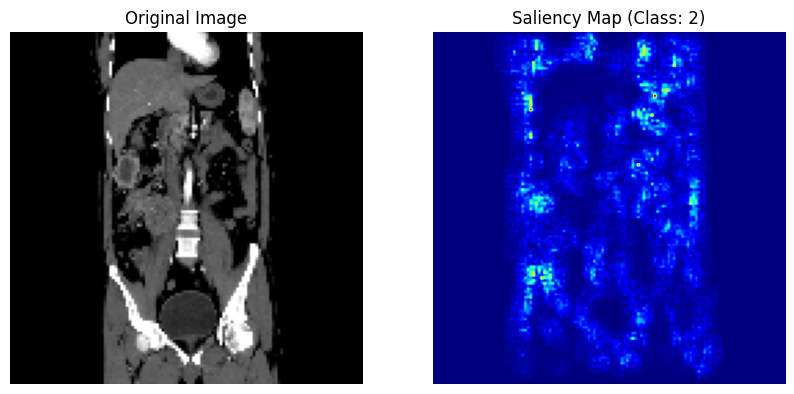

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def saliency_map(model, img_path, target_size=(128, 128), class_index=None):
    """
    Generate and display the saliency map of the input image.

    Parameters:
    - model: Trained Keras model.
    - img_path: Path to the input image.
    - target_size: Target image size to resize to (default: (128, 128)).
    - class_index: Target class index for which saliency is computed.
    """
    # Load and preprocess the image
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    img_tensor = tf.convert_to_tensor(np.expand_dims(img_array, axis=0), dtype=tf.float32)  # Ensure tf.Tensor

    # Ensure gradients are tracked
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        if class_index is None:
            class_index = np.argmax(predictions[0])
        print(f"Predicted class: {class_index}")

        # Target output for the chosen class
        target_output = predictions[:, class_index]

    # Calculate gradients
    grads = tape.gradient(target_output, img_tensor)
    grads_abs = tf.abs(grads)  # Use absolute value of gradients
    saliency = np.max(grads_abs, axis=-1)[0]  # Reduce across color channels

    # Visualize the saliency map
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')

    # Saliency Map
    plt.subplot(1, 2, 2)
    plt.imshow(saliency, cmap='jet')
    plt.title(f"Saliency Map (Class: {class_index})")
    plt.axis('off')

    plt.show()

test_image_path = "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1493).jpg"
saliency_map(kidney_model, test_image_path)


Predicted class: 2


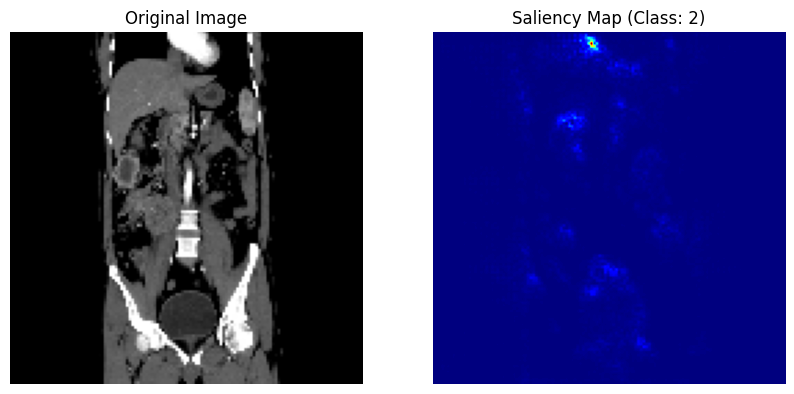

Predicted class: 2


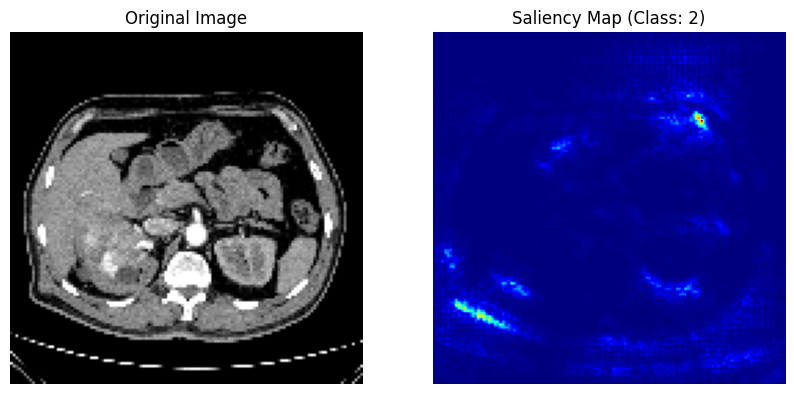

Predicted class: 2


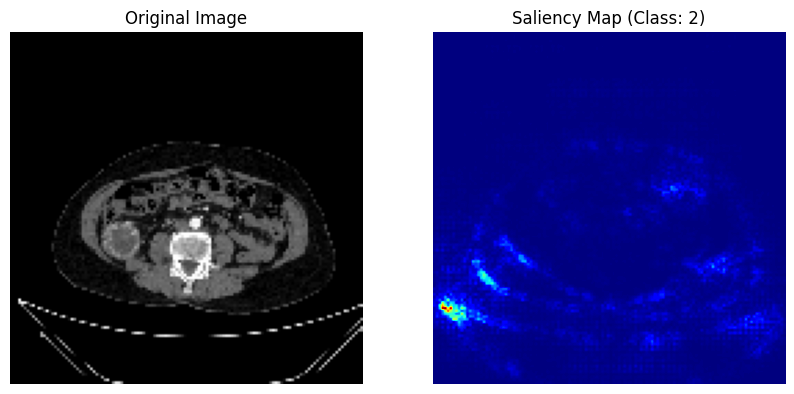

Predicted class: 2


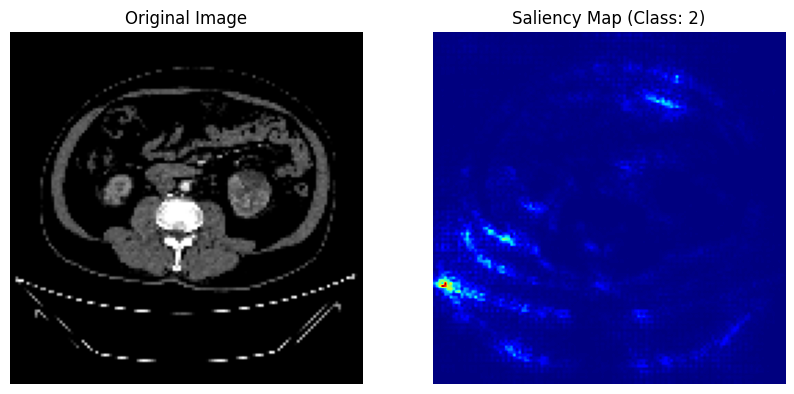

Predicted class: 2


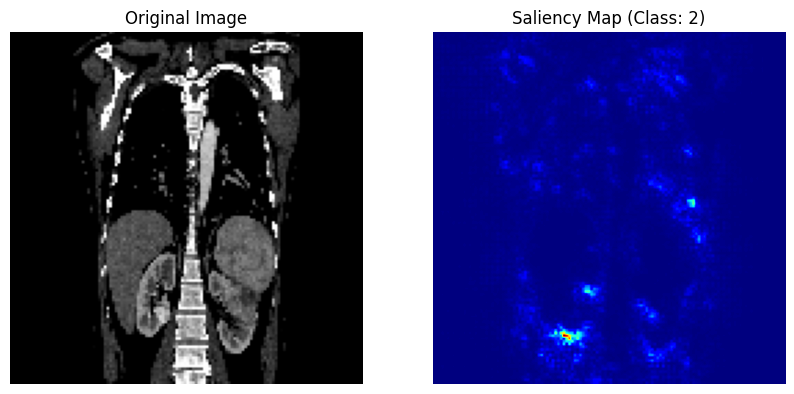

Predicted class: 2


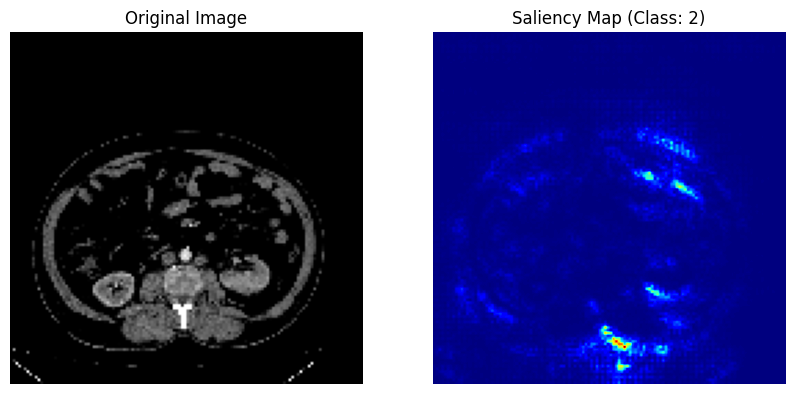

Predicted class: 2


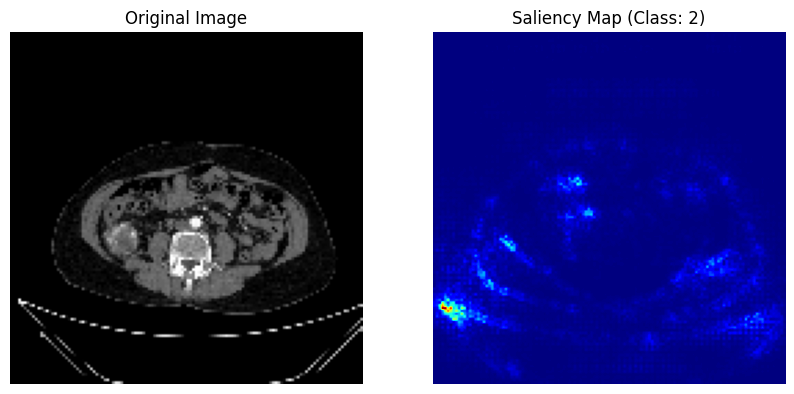

Predicted class: 2


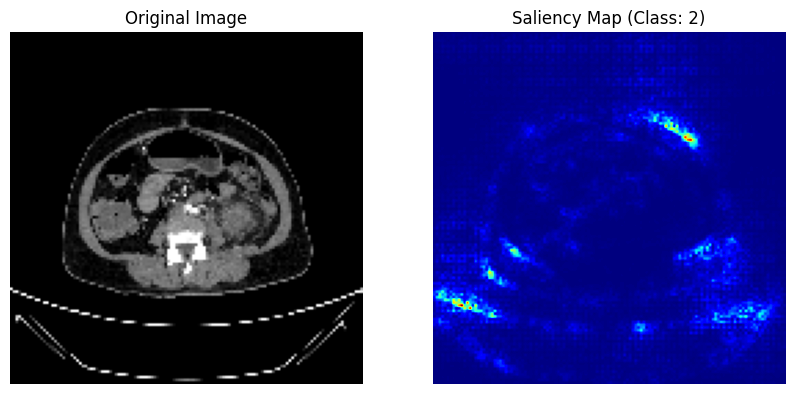

Predicted class: 2


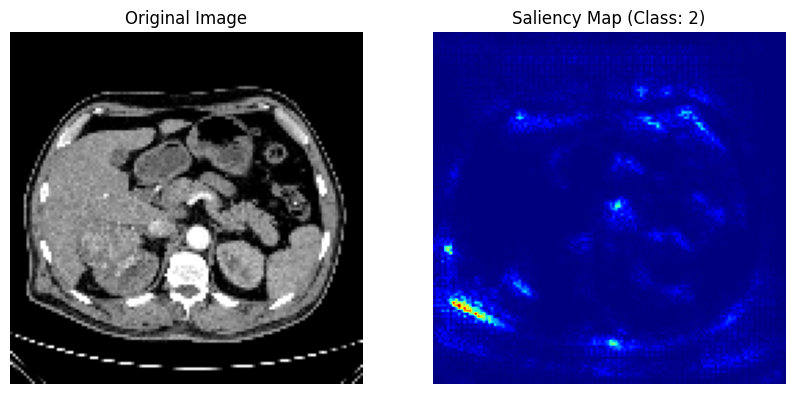

Predicted class: 2


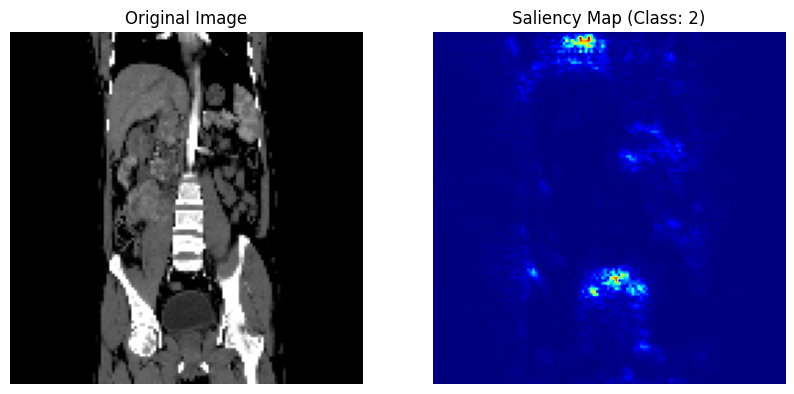

Predicted class: 2


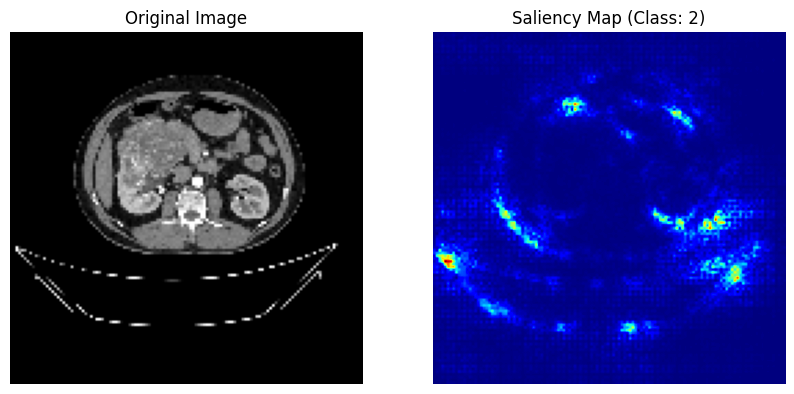

Predicted class: 2


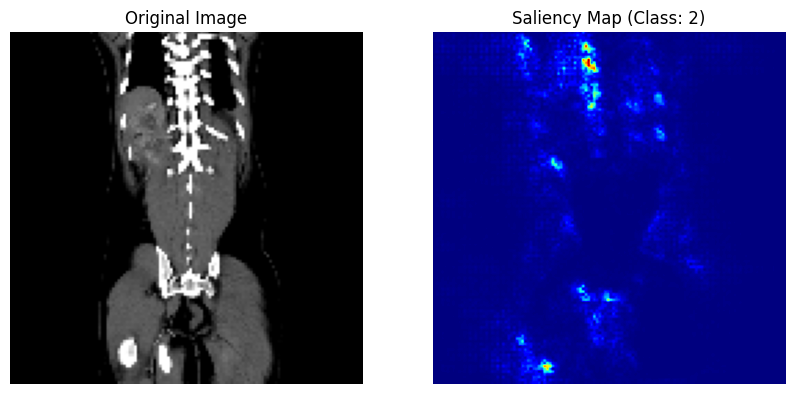

Predicted class: 2


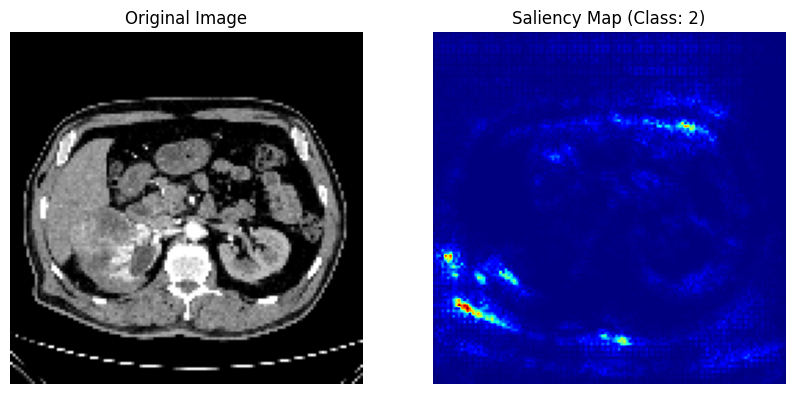

Predicted class: 2


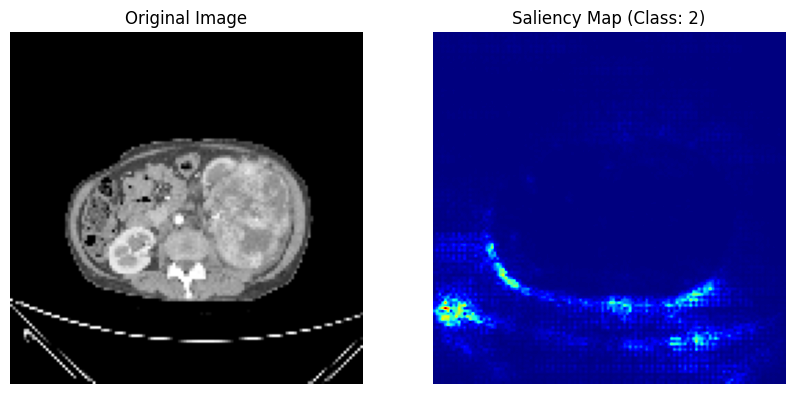

Predicted class: 2


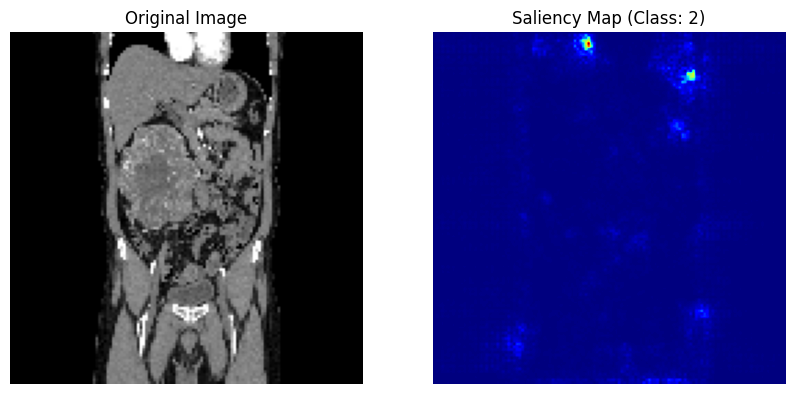

Predicted class: 2


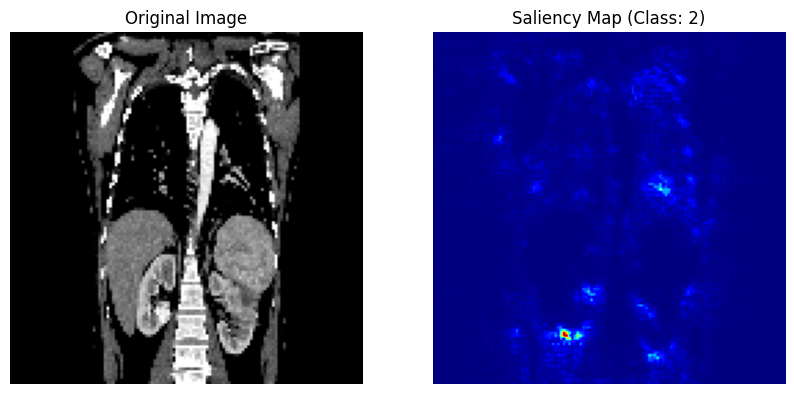

In [ ]:
# prompt: # take image path from the list and plot saliency map

image_paths = [
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1493).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (458).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (914).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1894).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1110).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1016).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (919).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1819).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (443).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1516).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (37).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1594).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (480).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (649).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (248).jpg",
    "/root/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1236).jpg",

]

for image_path in image_paths:
    saliency_map(kidney_model, image_path)

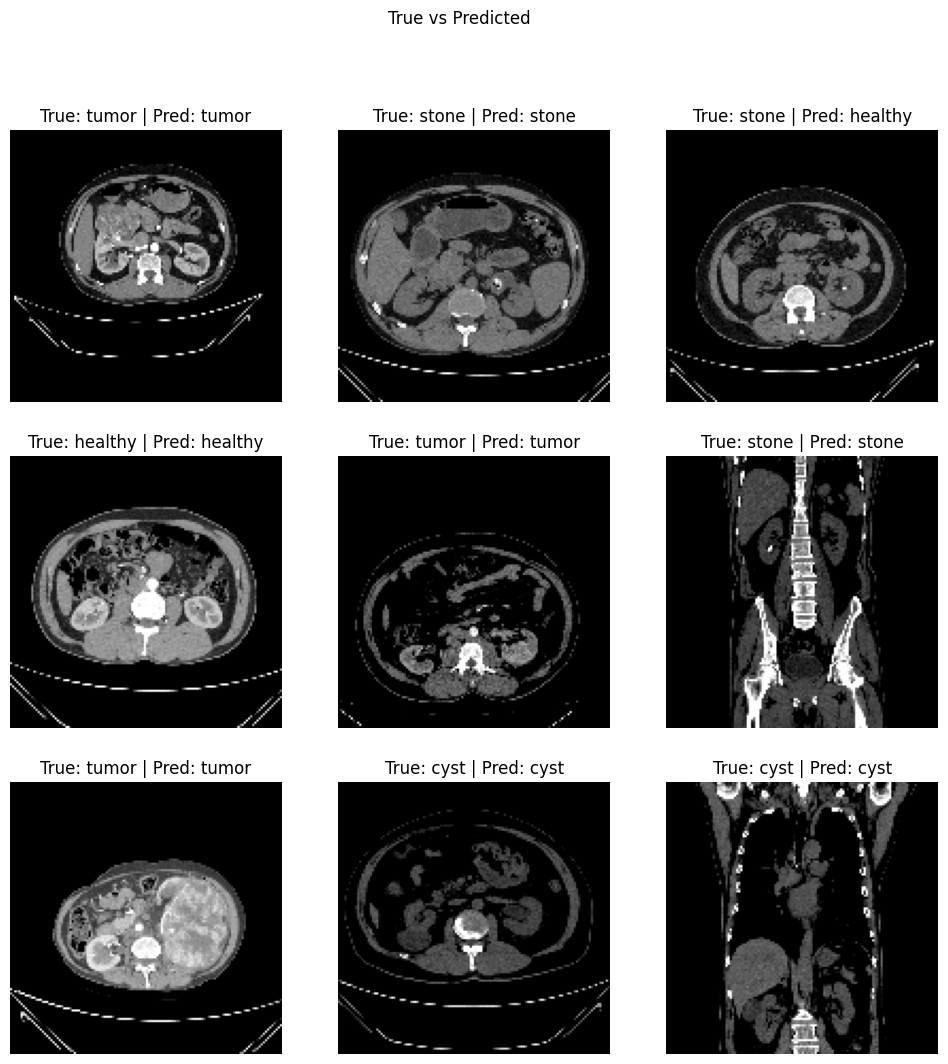

In [ ]:
def plot_predictions(X_test, y_test, y_pred):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.ravel()
    for i in range(9):
        ax = axes[i]
        ax.imshow(X_test[i])
        ax.axis('off')
        ax.set_title(f"True: {CLASSES[np.argmax(y_test[i])]} | Pred: {CLASSES[np.argmax(y_pred[i])]}")
    plt.suptitle("True vs Predicted")
    plt.show()

plot_predictions(X_test, y_test, y_pred)


In [ ]:
# Save the trained model
model_save_path = 'kidney_disease_classification_model.h5'
kidney_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to kidney_disease_classification_model.h5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files
import os

# Define class names
CLASSES = ["Normal", "Cyst", "Tumor", "Stone"]  # Update according to your dataset

# Define image size
IMG_SIZE = (224, 224)  # Update to the size your model expects

# Upload model
print("Upload your .h5 model file:")
uploaded_model = files.upload()
model_path = list(uploaded_model.keys())[0]

# Load the model
kidney_model = load_model(model_path)
print(f"Model loaded: {model_path}")

# Function to predict image
def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0  # Normalize image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = kidney_model.predict(img_array)
    predicted_class = CLASSES[np.argmax(prediction)]  # Get the predicted class
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# Upload and test image
print("Upload an image to test:")
uploaded_image = files.upload()
image_path = list(uploaded_image.keys())[0]

# Predict and display results
predict_image(image_path)

Upload your .h5 model file:


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
def load_trained_model(model_path):
    return load_model(model_path)

# Perform Canny edge detection
def carve_tumor_edges(image, x1, y1, x2, y2):
    # Crop the region of interest (ROI)
    roi = image[y1:y2, x1:x2]

    # Convert to grayscale
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_roi = cv2.GaussianBlur(gray_roi, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred_roi, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours for visualization
    contour_img = cv2.cvtColor(gray_roi, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

    # Display the edges and contours
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title("Edges")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(contour_img)
    plt.title("Contours")
    plt.axis("off")
    plt.show()

# Predict and analyze the image
def predict_and_analyze(image_path, model_path):
    # Load the model
    model = load_trained_model(model_path)

    # Load the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Load the original image for visualization
    original_image = cv2.imread(image_path)
    h, w, _ = original_image.shape
    x1, y1, x2, y2 = int(w * 0.3), int(h * 0.3), int(w * 0.7), int(h * 0.7)

    # Perform edge detection
    carve_tumor_edges(original_image, x1, y1, x2, y2)

    # Print the prediction result
    print(f"Predicted Class: {predicted_class}")

# Example usage
model_path = "/content/kidney_disease_classification_model.h5"
image_path = "path_to_your_image.jpg"
predict_and_analyze(image_path, model_path)